 ## Conversion of the density response function from reciprocal to direct space
 
 Code to convert the $\chi^0_{\textbf{G},\textbf{G'}}(\textbf{q})$ of Abinit into a $\chi^0(\textbf{r},\textbf{r'})$ for a given $\omega$

 The code will take as an input a .SUS file and the q-point grid used to obtain the file. After the file is converted in a readable format, extraction of the $\chi^0_{\textbf{G},\textbf{G'}}(\textbf{q})$ matrices for every given $\textbf{q}$ will begin. The resulting matrix have the shape \[nw, ng, ng\] nw being the number of frequencies probed and ng the number of vectors $\textbf{G}$ used during the computation (see variable ecuteps).

 After collecting those matrix, the Fourier serie will be recomposed (for every $\omega$). The following formula will be used. $$\chi^0(\textbf{r},\textbf{r'},\omega)=\frac{1}{\Omega}\sum_{\textbf{q}}^{\text{BZ}}\sum_{\textbf{G},\textbf{G'}}\exp(i(\textbf{q}+\textbf{G})\cdot\textbf{r})\exp(-i(\textbf{q}+\textbf{G'})\cdot\textbf{r'})\chi^0_{\textbf{G},\textbf{G'}}(\textbf{q},\omega)$$
 

 This achieves the purpose of this code sections. The next steps, described hereunder, are to combine two of those function to get the $\chi^0(\textbf{r},\textbf{r'})$ function of a inhomogeneous system. Those functions could then be express in the reciprocal space if needed. Tools to manipulate, visualize and extract information out of the $\chi^0(\textbf{r},\textbf{r'})$ function will also be implemented.

## List of the functions

- Four6dp_opt(filename) : takes a .SUS file as en entry and output $\chi^0(\boldsymbol{r},\boldsymbol{r'})$. The output function as a size (d1.d2.d3,d1.d2.d3) (see GsphereSize(Grid))

- Dict_init(Grid,nqg) : Associate the index of a vector to the grid. Complete the grid by taking all the missing $-(\boldsymbol{q}+\boldsymbol{G})$ of the initial grid, useful for symmetrization.

- chi0GG_const(sus_ncfile,kpoints,nkpt,ng,nvec,omega) : takes the generic data of the .SUS file as the entry and construct $\chi^0(\boldsymbol{q}+\boldsymbol{G},\boldsymbol{q}+\boldsymbol{G'})$ of size $nqg\times nqg$ with $nqg=ng.nq$ for a given omega (referenced as an index in the list of omega).

- chi0GGsym_const(vectoind,indtovec,nkpt,nqg,ng,nvec,chi0GG): takes both dictionnaries and generic information about the dimensions of the problem to symmetrize chi0GG. Output is called chi0GGsym.

- qG\_Grid(nqg,kpoints,nkpt,ng,G) : construct the grid of all the $\boldsymbol{q}+\boldsymbol{G}$ vectors scaled such that all the values are integers (the grid is constructed in such a way that the order is the same as the one of the input of the $\chi^0(\boldsymbol{q}+\boldsymbol{G},\boldsymbol{q}+\boldsymbol{G'})$ matrix i.e. \{$\boldsymbol{q}_0+\boldsymbol{G}_0$,$\boldsymbol{q}_0+\boldsymbol{G}_1$,...,$\boldsymbol{q}_{nq}+\boldsymbol{G}_{ng-1}$,$\boldsymbol{q}_{nq}+\boldsymbol{G}_{ng}$\}). The scaling is necessary as the values are used as indices. To recover the $\boldsymbol{q}+\boldsymbol{G}$, one as to multiply by the ouput of FindSmallerKpoint(kpoints).

- FindSmallerKpoint(kpoints) : Find the step used to sample the Brillouin zone.

- GsphereSize(Grid) : takes the list of $\boldsymbol{q}+\boldsymbol{G}$ vectors and establishes the dimensions of the smallest FFT box for this problem. The output are d1,d2,d3.

- Gtor(nvec,fftboxsize,indtovec,n1,n2,n3,chi0GGsym) : initialize the matrix chi0rG and launch the FFT algorithm on each column of chi0GGsym

- Gprimtorprim(nvec,fftboxsize,indtovec,n1,n2,n3,chi0rG) : initialize the matrix chi0rr and launch the FFT algorithm on each row of chi0rG

- FFT1(column,Grid,n1,n2,n3,nqg,fftboxsize) : performs the FFT to transform $\boldsymbol{G}$ in $\boldsymbol{r}$ for the input 'column' which contains the values of $\chi^0(\boldsymbol{q}+\boldsymbol{G},\boldsymbol{q}+\boldsymbol{G'})$ for a fixed $\boldsymbol{q}+\boldsymbol{G'}$. The output is an array of dimension d1.d2.d3=fftboxsize.

- FFT2(row,Grid,n1,n2,n3,nqg,fftboxsize) : performs the FFT to transform $\boldsymbol{G'}$ in $\boldsymbol{r}$ for the input 'row' which contains the values of $\chi^0(\boldsymbol{r},\boldsymbol{q}+\boldsymbol{G'})$ for a fixed $\boldsymbol{r}$. The output is an array of dimension d1.d2.d3=fftboxsize. The input of the FFT box is transposed in order to take care of the '-' sign in the exponential.


## Important Data extracted from the case of Bulk Al

- ### Analysis of $\chi^0(\boldsymbol{q}+\boldsymbol{G},\boldsymbol{q}+\boldsymbol{G'})$ :

    $\chi^0(0,0)$=-1.49347290e-08+5.97943131e-26j

    Max Real= 0.01511583011597395

    Max Imag= 1.6176227290998213e-05

    Min Real= -0.13832195103168488

    Min Imag= -1.6176227290998213e-05

    Number of entries : 64 q-points; 113 G vectors. Size of the FFT sphere from -3.25 to 3 in each direction (-3.5 to 3.5 after symmetrization).
    
    Dimensions of the FFT box : (29,29,29)

- ### Analysis of $\chi^0(\boldsymbol{r},\boldsymbol{r'})$ :

    $\chi^0(0,0)$=-1.56884346e-09+0.j

    Max Real= 1.0629853093462819e-08

    Max Imag= 0.0

    Min Real= -2.456582783980441e-07

    Min Imag= 0.0
    
    Number of entries : 24389 r vectors with smallest step : $4||\boldsymbol{R}||/29=0.3939310344827586$ angstrom

    $\int_{\boldsymbol{r}}\delta\rho(\boldsymbol{r})d\boldsymbol{r}=\int_{\boldsymbol{r}}\int_{\boldsymbol{r'}}\chi^0(\boldsymbol{r},\boldsymbol{r'})d\boldsymbol{r}d\boldsymbol{r'}=1.4385998524371337e-08+0j$ ($V(\boldsymbol{r'})=1$)

    Mean asymmetry : 8.153248024909498e-13
    




    

In [1]:
import numpy as np
import math 
import cmath
import abipy
from abipy.electrons.scr import ScrFile
from operator import add
import unittest
import time
from multiprocessing import Pool
import matplotlib.pyplot as plt

In [2]:
def openfile(filename):
    #Get the main data
    ##Open the file
    sus_ncfile = ScrFile(filename)
    ##Get the list of kpoints
    kpoints=sus_ncfile.reader.kpoints 
    ##Get the number of frequencies
    nw=sus_ncfile.reader.nw
    ##Get the number of G-vectors
    ng=sus_ncfile.reader.ng 
    ##Get the number of kpoints
    nkpt=len(kpoints)
    ##Get the chi0 matrix of q=0 0 0
    chi0=sus_ncfile.reader.read_wggmat(kpoints[0])
    ##Get the list of G vectors
    G=chi0.gsphere.gvecs
    
    #Create a 2D FFT box where each index correspond to a q+G vector chi0(q+G1,q+G2)
    nqg=nkpt*ng

    return sus_ncfile,kpoints,nw,ng,nkpt,G,nqg


In [3]:

def qG_Grid(nqg,kpoints,nkpt,ng,G):
    Grid=np.zeros((nqg,3),dtype=int)
    n=round(1/FindSmallerKpoint(kpoints))
    for i in range(nkpt):
        for j in range(ng):
            Grid[nkpt*j+i]=np.round((kpoints[i].frac_coords+G[j])*n)
    
    return Grid

In [4]:
def Dict_init(Grid,nqg):
    vectoind={}
    indtovec={}
    newind=nqg
    for i in range(nqg):
        vectoind[(Grid[i,0],Grid[i,1],Grid[i,2])]=i
        indtovec[i]=(Grid[i,0],Grid[i,1],Grid[i,2]) 
    for i in range(nqg):
        vec=indtovec[i]
        vectest=(-vec[0],-vec[1],-vec[2])
        if vectest not in vectoind.keys():
            vectoind[vectest]=newind
            indtovec[newind]=vectest
            newind+=1
    return vectoind,indtovec

In [5]:
def FindSmallerKpoint(kpoints):
    Mink=1
    for i in range(len(kpoints)):
        k=kpoints[i].frac_coords
        a=abs(k[0])
        b=abs(k[1])
        c=abs(k[2])
        if a==0:
            if b==0:
                if c==0:
                    Mink=Mink
                else:
                    Mink=min(Mink,c)
            else:
                if c==0:
                    Mink=min(Mink,b)
                else:
                    Mink=min(Mink,b,c)
        else:
            if b==0 and c==0:
                Mink=min(a,Mink)
            elif b==0:
                Mink=min(Mink,a,c)
            elif c==0:
                Mink=min(Mink,a,b)
            else:
                Mink=min(a,b,c,Mink)
    return Mink

In [6]:
def GsphereSize(Grid):
    n1=0
    n2=0
    n3=0
    n4=0
    n5=0
    n6=0
    for i in range(len(Grid)):
        a,b,c=Grid[i,0],Grid[i,1],Grid[i,2]
        n1,n2,n3=max(n1,a),max(n2,b),max(n3,c)
        n4,n5,n6=min(n4,a),min(n5,b),min(n6,c)
    n1,n2,n3=max(n1,abs(n4)),max(n2,abs(n5)),max(n3,abs(n6))
    s1=int(2*n1+1)
    s2=int(2*n2+1)
    s3=int(2*n3+1)
    return s1,s2,s3

In [7]:
def chi0GG_const(sus_ncfile,kpoints,nkpt,ng,nvec,omega):
    chi0GG=np.zeros((nvec,nvec),dtype=complex)
    for k in range(nkpt):
        chi0=sus_ncfile.reader.read_wggmat(kpoints[k]).wggmat
        #print('chi0[',k,']=',chi0[0])
        for i in range(ng):
            for j in range(ng):
                chi0GG[i*nkpt+k,j*nkpt+k]=chi0[omega,i,j]
    return chi0GG

In [8]:
def chi0GGsym_const(vectoind,indtovec,nkpt,nqg,ng,nvec,chi0GG):
    chi0GGsym=np.zeros((nvec,nvec),dtype=complex)
    for p in range(nqg):
        for q in range(ng):
            i,j=q*nkpt+(p%nkpt),p
            qG=indtovec[i]
            qGprim=indtovec[j]
            m=vectoind[(-qG[0],-qG[1],-qG[2])]
            n=vectoind[(-qGprim[0],-qGprim[1],-qGprim[2])]
            chi0GGsym[i,j]=1/2*(chi0GG[i,j]+np.conj(chi0GG[m,n]))
            chi0GGsym[m,n]=1/2*(chi0GG[m,n]+np.conj(chi0GG[i,j]))
    return chi0GGsym

In [9]:
def Gtor(nvec,fftboxsize,indtovec,n1,n2,n3,chi0GGsym):
    chi0rG=np.zeros((fftboxsize,nvec),dtype=complex)
    for i in range(nvec):
        #if i%200==0:
            #print(i/nvec*100,'percent of the first FFT is done')
        chi0rG[:,i]=FFT1(chi0GGsym[:,i],indtovec,n1,n2,n3,nvec,fftboxsize)
    return chi0rG

In [10]:
def FFT1(column,indtovec,n1,n2,n3,nvec,fftboxsize):
    FFTSphere=np.zeros((n1,n2,n3),dtype=complex)
    FFT=np.zeros((n1,n2,n3),dtype=complex)
    columnout=np.zeros((fftboxsize),dtype=complex)
    for i in range(nvec):
        vec=indtovec[i]
        FFTSphere[vec[0],vec[1],vec[2]]=column[i]
    FFT=np.fft.ifftn(FFTSphere)
    for i in range(n1):
        for j in range(n2):
            for k in range(n3):
                columnout[k+j*n3+i*n3*n2]=FFT[i,j,k]
    #print(columnout)
    return columnout


In [11]:
def Gprimtorprim(nvec,fftboxsize,indtovec,n1,n2,n3,chi0rG):
    chi0rr=np.zeros((fftboxsize,fftboxsize),dtype=complex)
    for j in range(fftboxsize):
        #if j%200==0:
            #print(j/fftboxsize*100,'percent of the second FFT is done')
        chi0rr[j,:]=FFT2(chi0rG[j,:],indtovec,n1,n2,n3,nvec,fftboxsize)
    return chi0rr

In [12]:
def FFT2(row,indtovec,n1,n2,n3,nvec,fftboxsize):
    FFTSphere=np.zeros((n1,n2,n3),dtype=complex)
    FFT=np.zeros((n1,n2,n3),dtype=complex)
    rowout=np.zeros(fftboxsize,dtype=complex)
    for i in range(nvec):
        vec=indtovec[i]
        FFTSphere[-vec[0],-vec[1],-vec[2]]=row[i]
    FFT=np.fft.ifftn(FFTSphere)
    for i in range(n1):
        for j in range(n2):
            for k in range(n3):
                rowout[k+j*n3+i*n3*n2]=FFT[-i,-j,-k]
    return rowout

In [13]:
def Four6dp_opt_FromSym(filename,omega=0):
    sus_ncfile,kpoints_base,nw,ng,nkpt,G,nqg=openfile(filename)
    kpoints=[[0,0,0],[0.25,0,0],[0.5,0,0],[0.25,0.25,0],[0.5,0.25,0],[-0.25,0.25,0],[0.5,0.5,0],[-0.25,0.5,0.25]]
    print('Data extracted : ',ng,' G-vectors and ',nkpt,' q points (',nqg,' vectors to sample)')
    #Grid=qG_Grid(nqg,kpoints,nkpt,ng,G)
    #n1,n2,n3=GsphereSize(Grid)
    #fftboxsize=n1*n2*n3
    #print('Gsphere contains ',len(Grid),'vectors')
    #print('The FFT box should at least have the dimensions (',n1,n2,n3,')')
    #vectoind,indtovec=Dict_init(Grid,nqg)
    
    print('The dictionnaries are initialized')
    #Construction of chi0(q+G,q+G')
    #chi0GG=chi0GG_const(sus_ncfile,kpoints,nkpt,ng,nvec,omega)
    chi0GG,vectoind,indtovec,Grid=Build_chi0GG(kpoints,nsym,SymRec,TRec,G,ng)
    nvec=len(vectoind)
    n1,n2,n3=GsphereSize(Grid)
    fftboxsize=n1*n2*n3
    #Symmetrize chi0(q+G,q+G')
    chi0GGsym=chi0GGsym_const(vectoind,indtovec,nkpt,nqg,ng,nvec,chi0GG)
    print(chi0GGsym)
    ##Takes each column of chi0(q+G,q+G'), transforms it and store it in chi0(r,q+G')
    chi0rG=Gtor(nvec,fftboxsize,indtovec,n1,n2,n3,chi0GGsym)
    ##Takes each row of chi0(r,q+G'), transforms it and store it in chi0(r,r')
    chi0rr=Gprimtorprim(nvec,fftboxsize,indtovec,n1,n2,n3,chi0rG)
    return chi0rr

In [14]:
def Four6dp_opt(filename,omega=0):
    sus_ncfile,kpoints,nw,ng,nkpt,G,nqg=openfile(filename)
    print('Data extracted : ',ng,' G-vectors and ',nkpt,' q points (',nqg,' vectors to sample)')
    Grid=qG_Grid(nqg,kpoints,nkpt,ng,G)
    n1,n2,n3=GsphereSize(Grid)
    fftboxsize=n1*n2*n3
    print('Gsphere contains ',len(Grid),'vectors')
    print('The FFT box should at least have the dimensions (',n1,n2,n3,')')
    vectoind,indtovec=Dict_init(Grid,nqg)
    nvec=len(vectoind)
    print('The dictionnaries are initialized')
    #Construction of chi0(q+G,q+G')
    chi0GG=chi0GG_const(sus_ncfile,kpoints,nkpt,ng,nvec,omega)
    #chi0GG,vectoind,indtovec,Grid=Build_chi0GG(kpoints,nsym,SymRec,TRec,G,ng)
    #Symmetrize chi0(q+G,q+G')
    chi0GGsym=chi0GGsym_const(vectoind,indtovec,nkpt,nqg,ng,nvec,chi0GG)
    print(chi0GGsym)
    ##Takes each column of chi0(q+G,q+G'), transforms it and store it in chi0(r,q+G')
    chi0rG=Gtor(nvec,fftboxsize,indtovec,n1,n2,n3,chi0GGsym)
    ##Takes each row of chi0(r,q+G'), transforms it and store it in chi0(r,r')
    chi0rr=Gprimtorprim(nvec,fftboxsize,indtovec,n1,n2,n3,chi0rG)
    return chi0rr

In [15]:
chi0rr=Four6dp_opt("scro_DS1_SUS.nc")

Data extracted :  113  G-vectors and  64  q points ( 7232  vectors to sample)
Gsphere contains  7232 vectors
The FFT box should at least have the dimensions ( 29 29 29 )
The dictionnaries are initialized
[[-1.49347290e-08+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j -1.38321728e-01+9.14691500e-12j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  -9.32756513e-02-5.18426552e-11j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 ...
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ... -3.90848436e-05+2.42207102e-15j
   0.00000000e+00+0.00000000e+00j  0.00000000e

In [49]:
print(chi0rr1)

[[-1.31786659e-09+0.j -8.75268997e-10+0.j -5.94043372e-10+0.j ...
  -6.56948119e-10+0.j -7.88963433e-10+0.j -5.71810985e-10+0.j]
 [-8.75362077e-10+0.j -1.28611792e-09+0.j -3.75688603e-09+0.j ...
  -1.62864833e-09+0.j -1.85167711e-08+0.j -5.32694098e-08+0.j]
 [-5.94384224e-10+0.j -3.75796990e-09+0.j -5.31463948e-09+0.j ...
  -1.99519675e-08+0.j -7.01536839e-08+0.j -1.02497842e-07+0.j]
 ...
 [-6.57073301e-10+0.j -1.62860282e-09+0.j -1.99518192e-08+0.j ...
   1.91433565e-10+0.j  1.07751326e-10+0.j -1.30170307e-10+0.j]
 [-7.89070068e-10+0.j -1.85170319e-08+0.j -7.01547377e-08+0.j ...
   1.07923350e-10+0.j -1.55773952e-10+0.j  1.92534649e-09+0.j]
 [-5.71912851e-10+0.j -5.32697754e-08+0.j -1.02498382e-07+0.j ...
  -1.30109122e-10+0.j  1.92516329e-09+0.j  5.71816991e-09+0.j]]


In [54]:
chi0rr=Four6dp_opt("scro_DS1_SUS.nc")

Data extracted :  113  G-vectors and  64  q points ( 7232  vectors to sample)
Gsphere contains  7232 vectors
The FFT box should at least have the dimensions ( 29 29 29 )
The dictionnaries are initialized
[[-1.49347290e-08+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j -1.38321728e-01+9.14691500e-12j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  -9.32756513e-02-5.18426552e-11j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 ...
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ... -3.90848436e-05+2.42207102e-15j
   0.00000000e+00+0.00000000e+00j  0.00000000e

In [58]:
chi0rr_scaled=chi0rr*(29**3/2.856**3/4**3)

In [56]:
print(chi0rr)

[[-1.56884346e-09+0.j -1.42714901e-09+0.j -1.29062448e-09+0.j ...
  -6.39796935e-10+0.j -9.33786330e-10+0.j -1.26495952e-09+0.j]
 [-1.42606608e-09+0.j -8.18922770e-10+0.j -4.08281657e-09+0.j ...
  -2.17739179e-09+0.j -2.19769962e-08+0.j -5.80065926e-08+0.j]
 [-1.28765852e-09+0.j -4.08108453e-09+0.j -5.28960520e-09+0.j ...
  -2.36531762e-08+0.j -7.70472879e-08+0.j -1.12198717e-07+0.j]
 ...
 [-6.39048344e-10+0.j -2.17428329e-09+0.j -2.36524247e-08+0.j ...
   4.83748713e-10+0.j  4.94277560e-10+0.j -3.45106258e-10+0.j]
 [-9.33215755e-10+0.j -2.19770518e-08+0.j -7.70603783e-08+0.j ...
   4.94029238e-10+0.j -4.32246349e-10+0.j  1.05439572e-09+0.j]
 [-1.26538320e-09+0.j -5.80073612e-08+0.j -1.12202014e-07+0.j ...
  -3.44961688e-10+0.j  1.05442396e-09+0.j  4.27194937e-09+0.j]]


In [59]:
print(chi0rr_scaled)

[[-2.56636853e-08+0.j -2.33457984e-08+0.j -2.11124828e-08+0.j ...
  -1.04660201e-08+0.j -1.52752006e-08+0.j -2.06926465e-08+0.j]
 [-2.33280834e-08+0.j -1.33962227e-08+0.j -6.67881293e-08+0.j ...
  -3.56185299e-08+0.j -3.59507325e-07+0.j -9.48891956e-07+0.j]
 [-2.10639647e-08+0.j -6.67597960e-08+0.j -8.65291962e-08+0.j ...
  -3.86926858e-07+0.j -1.26036625e-06+0.j -1.83538551e-06+0.j]
 ...
 [-1.04537744e-08+0.j -3.55676800e-08+0.j -3.86914565e-07+0.j ...
   7.91332920e-09+0.j  8.08556373e-09+0.j -5.64536785e-09+0.j]
 [-1.52658669e-08+0.j -3.59508234e-07+0.j -1.26058039e-06+0.j ...
   8.08150159e-09+0.j -7.07083566e-09+0.j  1.72481708e-08+0.j]
 [-2.06995772e-08+0.j -9.48904530e-07+0.j -1.83543945e-06+0.j ...
  -5.64300291e-09+0.j  1.72486328e-08+0.j  6.98820293e-08+0.j]]


In [60]:
sumrr=np.sum(chi0rr)

In [61]:
sumrr_scaled=np.sum(chi0rr_scaled)

In [62]:
sumrr1=np.sum(chi0rr1)

In [63]:
print('SumRR= ',sumrr)
print('SumRR_scaled= ',sumrr_scaled)
print('SumRR1= ',sumrr1)

SumRR=  (-1.4934729009173516e-08+0j)
SumRR_scaled=  (-2.443074761156301e-07+0j)
SumRR1=  (-1.4934729009022797e-08+0j)


In [20]:
X=np.linspace(0,29,29)
X=X*4/29
print(X)

[0.         0.14285714 0.28571429 0.42857143 0.57142857 0.71428571
 0.85714286 1.         1.14285714 1.28571429 1.42857143 1.57142857
 1.71428571 1.85714286 2.         2.14285714 2.28571429 2.42857143
 2.57142857 2.71428571 2.85714286 3.         3.14285714 3.28571429
 3.42857143 3.57142857 3.71428571 3.85714286 4.        ]


In [21]:
YR1=chi0rr[0,0:29]
YR2=np.zeros(29)
YR3=np.zeros(29)
for i in range(29):
    YR2[i]=chi0rr[0,i*29]
    YR3[i]=chi0rr[0,i*29**2]



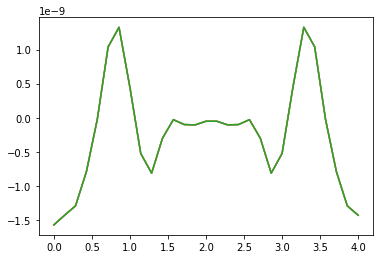

In [22]:
plt.plot(X,YR1,X,YR2,X,YR3)

In [125]:
def VisualizationRR(R,axe,n1,n2,n3,cellnumber,chi0rr):
    indexr=R[2]+R[1]*n3+R[0]*n3*n2
    if axe[0]!=0:
        L1=math.floor(n1/axe[0])
    else:
        L1=n1
    if axe[1]!=0:
        L2=math.floor(n2/axe[1])
    else:
        L2=n2
    if axe[2]!=0:
        L3=math.floor(n3/axe[2])
    else:
        L3=n3
    L=min(L1,L2,L3)
    if L!=n1:
        L+=1
    print(L)
    X=np.linspace(0,cellnumber-1/L,L)
    print(X)
    chi0rrprim=np.zeros(len(X))
    for i in range(len(X)):
        indexrprim=i*(axe[2]+axe[1]*n2+axe[0]*n3*n2)
        chi0rrprim[i]=chi0rr[indexr,indexrprim]
    plt.plot(X,chi0rrprim,'-*')

29
[0.         0.14162562 0.28325123 0.42487685 0.56650246 0.70812808
 0.84975369 0.99137931 1.13300493 1.27463054 1.41625616 1.55788177
 1.69950739 1.841133   1.98275862 2.12438424 2.26600985 2.40763547
 2.54926108 2.6908867  2.83251232 2.97413793 3.11576355 3.25738916
 3.39901478 3.54064039 3.68226601 3.82389163 3.96551724]


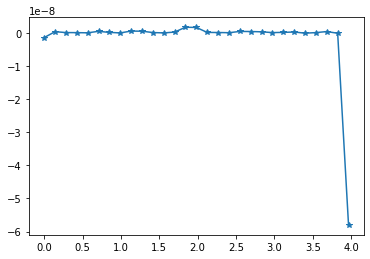

In [126]:
VisualizationRR([0,0,1],[1,1,1],29,29,29,4,chi0rr)

29
[0.         0.14162562 0.28325123 0.42487685 0.56650246 0.70812808
 0.84975369 0.99137931 1.13300493 1.27463054 1.41625616 1.55788177
 1.69950739 1.841133   1.98275862 2.12438424 2.26600985 2.40763547
 2.54926108 2.6908867  2.83251232 2.97413793 3.11576355 3.25738916
 3.39901478 3.54064039 3.68226601 3.82389163 3.96551724]


Text(0.5, 1.0, 'Chi0(0,[x,0,0])')

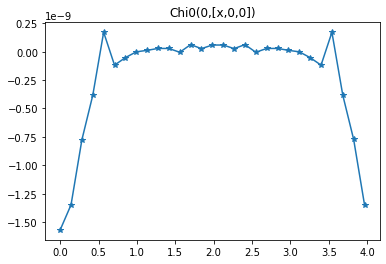

In [194]:
VisualizationRR([0,0,0],[1,1,0],29,29,29,4,chi0rr)
plt.title('Chi0(0,[x,y,0])')

10
[0.         0.43333333 0.86666667 1.3        1.73333333 2.16666667
 2.6        3.03333333 3.46666667 3.9       ]


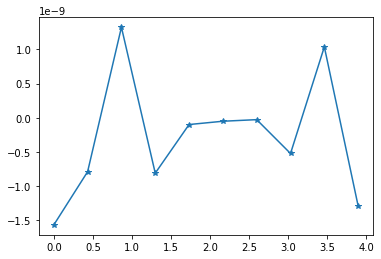

In [128]:
VisualizationRR([0,0,0],[3,0,0],29,29,29,4,chi0rr)

In [158]:
def Visualization_Surface(plan, level, r, chi0rr, N, cellnumber):
    chi0rr_surf=np.zeros((N,N))
    indexr=r[2]+r[1]*N+r[0]*N*N
    #plan with normal vector (100)
    if plan==0:
        for i in range(N):
            for j in range(N):
                indexrprim=j+i*N+level*N*N
                #j=z ; i=y
                chi0rr_surf[i,j]=chi0rr[indexr,indexrprim]
                pos=[r[1]/N,r[2]/N]
                plt.xlabel('z')
                plt.ylabel('y')
    #plan with normal vector (010)
    elif plan==1:
        for i in range(N):
            for j in range(N):
                indexrprim=j+level*N+i*N*N
                #j=z ; i=x
                chi0rr_surf[i,j]=chi0rr[indexr,indexrprim]
                pos=[r[0]/N,r[2]/N]
                plt.xlabel('z')
                plt.ylabel('x')
    #plan with normal vector (001)
    elif plan==2:
        for i in range(N):
            for j in range(N):
                indexrprim=level+j*N+i*N*N
                #j=y ; i=x
                chi0rr_surf[i,j]=chi0rr[indexr,indexrprim]
                plt.xlabel('y')
                plt.ylabel('x')
                pos=[r[0]/N,r[1]/N]
    else:
        return "The index of the plan is not taken into account"
    X=np.linspace(0,cellnumber-1/N, N)
    plt.contourf(X,X,chi0rr_surf)
    for i in range(cellnumber):
        for j in range(cellnumber):
            plt.plot(i,j,'ko',Markersize=10)
    plt.plot(cellnumber*(1-pos[1]),cellnumber*(1-pos[0]),'m^',Markersize=10)
    plt.colorbar()

In [189]:
R=[7,0,8]


Text(0.5, 1.0, 'Chi^0([6, 15, 8],[6,y,z])')

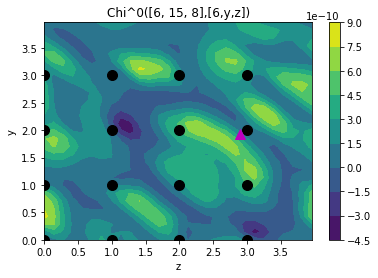

In [186]:
Level0=6
Visualization_Surface(0, Level0, R, chi0rr, 29, 4)
plt.title('Chi^0('+str(R)+',['+str(Level0)+',y,z])')

Text(0.5, 1.0, 'Chi^0([7, 0, 8],[x,0,z])')

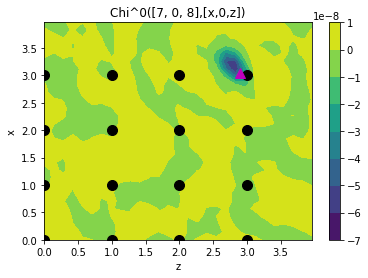

In [190]:
Level1=0
Visualization_Surface(1, Level1, R, chi0rr, 29, 4)
plt.title('Chi^0('+str(R)+',[x,'+str(Level1)+',z])')

Text(0.5, 1.0, 'Chi^0([7, 0, 8],[x,y,0])')

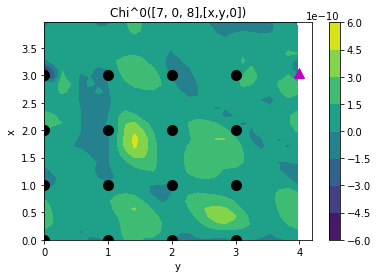

In [193]:
Level2=0
Visualization_Surface(2, Level2, R, chi0rr, 29, 4)
plt.title('Chi^0('+str(R)+',[x,y,'+str(Level2)+'])')

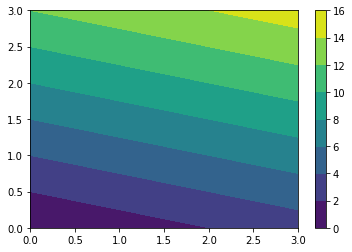

In [130]:
Mat=np.zeros((4,4))
for i in range(4):
    for j in range(4):
        Mat[i,j]=i*4+j
X_test=[0,1,2,3]
plt.contourf(X_test,X_test,Mat)
plt.colorbar()

In [39]:
print(chi0rr)

[[-1.56884346e-09+0.j -1.42714901e-09+0.j -1.29062448e-09+0.j ...
  -6.39796935e-10+0.j -9.33786330e-10+0.j -1.26495952e-09+0.j]
 [-1.42606608e-09+0.j -8.18922770e-10+0.j -4.08281657e-09+0.j ...
  -2.17739179e-09+0.j -2.19769962e-08+0.j -5.80065926e-08+0.j]
 [-1.28765852e-09+0.j -4.08108453e-09+0.j -5.28960520e-09+0.j ...
  -2.36531762e-08+0.j -7.70472879e-08+0.j -1.12198717e-07+0.j]
 ...
 [-6.39048344e-10+0.j -2.17428329e-09+0.j -2.36524247e-08+0.j ...
   4.83748713e-10+0.j  4.94277560e-10+0.j -3.45106258e-10+0.j]
 [-9.33215755e-10+0.j -2.19770518e-08+0.j -7.70603783e-08+0.j ...
   4.94029238e-10+0.j -4.32246349e-10+0.j  1.05439572e-09+0.j]
 [-1.26538320e-09+0.j -5.80073612e-08+0.j -1.12202014e-07+0.j ...
  -3.44961688e-10+0.j  1.05442396e-09+0.j  4.27194937e-09+0.j]]


In [19]:
##Open the file
sus_ncfile = ScrFile("/Users/acloots/Documents/Abinit/PostProcess/scro_DS1_SUS.nc")
##Get the list of kpoints
##Get the number of frequencies
nw=sus_ncfile.reader.nw
omegas=sus_ncfile.reader.wpoints
print(omegas)
##Get the number of G-vectors
ng=sus_ncfile.reader.ng 
##Get the number of kpoints
##Get the chi0 matrix of q=0 0 0
chi0=sus_ncfile.reader.read_wggmat([0,0,0])
##Get the list of G vectors
G=chi0.gsphere.gvecs
print(np.amax(chi0.wggmat[0].real))
#fftgrid=np.zeros((nqg,nqg),dtype=complex)


[0.        +0.j         0.11111111+0.j         0.22222222+0.j
 0.33333333+0.j         0.44444444+0.j         0.55555556+0.j
 0.66666667+0.j         0.77777778+0.j         0.88888889+0.j
 1.        +0.j         0.        +0.14404374j 0.        +0.39483845j
 0.        +0.83149741j 0.        +1.59176482j]
0.010436522774398327


In [17]:
def qG_Grid_sym(nqg,qpoints,nkpt,ng,G):
    Grid_ind=np.zeros((nqg,3),dtype=int)
    #Grid_qG=np.zeros((nqg,3),dtype=int)
    n=round(1/FindSmallerKpoint_sym(qpoints))
    for i in range(nkpt):
        for j in range(ng):
            Grid_ind[nkpt*j+i]=np.round((qpoints[i]+G[j])*n)
            #Grid_qG[nkpt*j+i]=np.round((qpoints[i]+G[j]))
    
    return Grid_ind
    

In [18]:
def FindSmallerKpoint_sym(kpoints):
    Mink=1
    for i in range(len(kpoints)):
        k=kpoints[i]
        a=abs(k[0])
        b=abs(k[1])
        c=abs(k[2])
        if a==0:
            if b==0:
                if c==0:
                    Mink=Mink
                else:
                    Mink=min(Mink,c)
            else:
                if c==0:
                    Mink=min(Mink,b)
                else:
                    Mink=min(Mink,b,c)
        else:
            if b==0 and c==0:
                Mink=min(a,Mink)
            elif b==0:
                Mink=min(Mink,a,c)
            elif c==0:
                Mink=min(Mink,a,b)
            else:
                Mink=min(a,b,c,Mink)
    return Mink

In [19]:
def Build_GDict(G,ng):
    G_dict={}
    for i in range(ng):
        G_dict[(G[i,0],G[i,1],G[i,2])]=i
    
    return G_dict

In [20]:
def Build_QpointList(indtovec_q,nqpt):
    qpoints=np.zeros((nqpt,3))
    for i in range(nqpt):
        qi=indtovec_q[i]
        qpoints[i]=[qi[0],qi[1],qi[2]]
    return qpoints

In [21]:
def Build_BZ(kpt,nsym,SymRec,TRec):
    vectoind_q,indtovec_q,sym_dict={},{},{}
    nkpt_test=len(kpt)
    ind=0
    for i in range(nsym):
        for j in range(nkpt_test):
            q=np.matmul(SymRec[i],kpt[j]+TRec[i])
            if (q[0],q[1],q[2]) not in vectoind_q.keys():
                if np.amax(q)<=0.5 and np.amin(q)>-0.5:
                    vectoind_q[(q[0],q[1],q[2])]=ind
                    indtovec_q[ind]=(q[0],q[1],q[2])
                    sym_dict[ind]=(i,j,0,0,0)
                    ind+=1
                else:
                    G0,G1,G2=0,0,0
                    if q[0]>0.5:
                        G0=-1
                    elif q[0]<=-0.5:
                        G0=1
                    if q[1]>0.5:
                        G1=-1
                    elif q[1]<=-0.5:
                        G1=1
                    if q[2]>0.5:
                        G2=-1
                    elif q[2]<=-0.5:
                        G2=1
                    Gi=[G0,G1,G2]
                    q=q+Gi
                    if (q[0],q[1],q[2]) not in vectoind_q.keys():
                    #print('q was added to the list after addition of an umklapp vector')
                        vectoind_q[(q[0],q[1],q[2])]=ind
                        indtovec_q[ind]=(q[0],q[1],q[2])
                        sym_dict[ind]=(i,j,G0,G1,G2)
                        ind+=1           
    return sym_dict,vectoind_q,indtovec_q

In [22]:
def Build_Gsphere(G):
    s0=np.amax(G[:,0])
    s1=np.amax(G[:,1])
    s2=np.amax(G[:,2])
    s3=np.amin(G[:,0])
    s4=np.amin(G[:,1])
    s5=np.amin(G[:,2])
    s6,s7,s8=max(s0,abs(s3)),max(s1,abs(s4)),max(s2,abs(s5))
    G_dict={}
    ind_dict={}
    for i in range(ng):
        G_dict[(G[i,0],G[i,1],G[i,2])]=i
        inddict[i]=[G[i,0],G[i,1],G[i,2]]
    ind=ng
    for i in range(2*s6+1):
        for j in range(2*s7+1):
            for k in range(2*s8+1):
                if (i-s6,j-s7,k-s8) not in G_dict.keys():
                    G_dict[(i-s6,j-s7,k-s8)]=ind
                    ind_dict[ind]=[i-s6,j-s7,k-s8]
                    ind+=1
    return G_dict,ind_dict


In [28]:
structure=abipy.core.structure.Structure.from_file("scro_DS1_SUS.nc")
#print(structure)
Sym=abipy.core.symmetries.AbinitSpaceGroup.from_structure(structure)
SymRec=Sym.symrec
TRec=Sym.tnons
Tim_Rev=Sym.has_timerev
nsym=len(SymRec)
kpt=[[0,0,0],[0.25,0,0],[0.5,0,0],[0.25,0.25,0],[0.5,0.25,0],[-0.25,0.25,0],[0.5,0.5,0],[-0.25,0.5,0.25]]
#print(SymRec)

In [40]:
def Build_chi0GG(kpt,nsym,SymRec,TRec,G,ng):
    #STEP1 : Recreate the BZ
    sym_dict,vectoind_q,indtovec_q=Build_BZ(kpt,nsym,SymRec,TRec)
    nqpt=len(sym_dict)
    #STEP2 : Create dictionnaries with the G vectors and q+G vectors
    
    G_dict=Build_GDict(G,ng)
    #Gcomp,indcomp=Build_Gsphere(G,ng)
    #ngcomp=len(Gcomp)
    qpoints=Build_QpointList(indtovec_q,nqpt)
    nqg=nqpt*ng
    Grid_ind=qG_Grid_sym(nqg,qpoints,nqpt,ng,G)
    #STEP3 : Create dictionnaries to keep track of the q+G vectord and their place in the table
    vectoind,indtovec=Dict_init(Grid_ind,nqg)
    #print(vectoind)
    #STEP4 : Build chi0 using equation in above cell
    nvec=len(vectoind)
    chi0GG=np.zeros((nvec,nvec),dtype=complex)
    ic=complex(0,1)
    n=round(1/FindSmallerKpoint_sym(qpoints))
    for i in range(nqpt):
        sym_data=sym_dict[i]
        print(qpoints[sym_data[1]])
        chi0=sus_ncfile.reader.read_wggmat(qpoints[sym_data[1]]).wggmat[0]
        sym=sym_data[0]
        t=TRec[sym]
        S=np.linalg.inv(SymRec[sym])
        qvec=qpoints[i]
        print(qvec)
        for j in range(ng):
            G1=G[j]
            qG1=(qvec+G1)*n
            ind1=vectoind[(qG1[0],qG1[1],qG1[2])]
            G1Gs=G1#+[sym_data[2],sym_data[3],sym_data[4]]
            Gind1=np.matmul(S,G1Gs)
            indchi1=G_dict[(Gind1[0],Gind1[1],Gind1[2])]
            for k in range(ng):
                G2=G[k]
                qG2=(qvec+G2)*n
                ind2=vectoind[(qG2[0],qG2[1],qG2[2])]
                G2Gs=G2#+[sym_data[2],sym_data[3],sym_data[4]]
                Gind2=np.matmul(S,G2Gs)
                indchi2=G_dict[(Gind2[0],Gind2[1],Gind2[2])]
                chi0GG[ind1,ind2]=cmath.exp(ic*np.dot(t,G2-G1))*chi0[indchi1,indchi2]
    return chi0GG,vectoind,indtovec,Grid_ind


In [29]:
chi0GG=Build_chi0GG(kpt,nsym,SymRec,TRec,G,ng)
            

[0. 0. 0.]
[0. 0. 0.]
[0.25 0.   0.  ]
[0.25 0.   0.  ]
[0.5 0.  0. ]
[0.5 0.  0. ]
[0.25 0.25 0.  ]
[0.25 0.25 0.  ]
[0.5  0.25 0.  ]
[0.5  0.25 0.  ]
[-0.25  0.25  0.  ]
[-0.25  0.25  0.  ]
[0.5 0.5 0. ]
[0.5 0.5 0. ]
[-0.25  0.5   0.25]
[-0.25  0.5   0.25]
[0.25 0.   0.  ]
[-0.25  0.    0.  ]
[0.25 0.25 0.  ]
[-0.25 -0.25  0.  ]
[0.5  0.25 0.  ]
[ 0.5  -0.25  0.  ]
[-0.25  0.25  0.  ]
[ 0.25 -0.25  0.  ]
[-0.25  0.5   0.25]
[ 0.25  0.5  -0.25]
[0.25 0.   0.  ]
[0.25 0.25 0.25]
[0.5 0.  0. ]
[0.5 0.5 0.5]
[0.25 0.25 0.  ]
[0.   0.25 0.25]
[0.5  0.25 0.  ]
[0.25 0.5  0.5 ]
[-0.25  0.25  0.  ]
[ 0.5  -0.25 -0.25]
[0.5 0.5 0. ]
[0.  0.5 0.5]
[0.25 0.   0.  ]
[-0.25 -0.25 -0.25]
[0.25 0.25 0.  ]
[ 0.   -0.25 -0.25]
[0.5  0.25 0.  ]
[-0.25  0.5   0.5 ]
[-0.25  0.25  0.  ]
[0.5  0.25 0.25]
[0.25 0.   0.  ]
[0.   0.   0.25]
[0.5 0.  0. ]
[0.  0.  0.5]
[0.5  0.25 0.  ]
[-0.25 -0.25  0.25]
[-0.25  0.25  0.  ]
[-0.25 -0.25  0.5 ]
[0.25 0.   0.  ]
[ 0.    0.   -0.25]
[0.5  0.25 0.  ]
[ 0.25  0.

In [95]:
print(chi0GG)

[[-1.49347290e-08+5.97943131e-26j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j -1.38321742e-01+9.14690892e-12j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  -9.32756364e-02-5.18426482e-11j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 ...
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+

In [96]:
count=0
for i in range(len(chi0GG[:,0])):
    for j in range(len(chi0GG[0,:])):
        if chi0GG[i,j]!=0:
            count+=1
print(count)

817216


In [76]:
64*113*113

817216

## How to reconstruct the data from the IBZ :

Data required : $\chi^0_{\boldsymbol{q}}(\boldsymbol{G},\boldsymbol{G})$ for $\boldsymbol{q}$ in the IBZ, table of the symmetry (S+t) in the reciprocal space.

1. Reconstruct the grid of the BZ :
    Start from the IBZ and apply the symmetries + store in dictionnary pair q=Sq so the symmetry operation is easily recover in the next step
2. Initialize the matrix $\chi^0_{\boldsymbol{q}}(\boldsymbol{G},\boldsymbol{G})$ for $\boldsymbol{q}$ in the BZ
    Use the size of the dictionnary of $\boldsymbol{q}$ used in (1) and multiply by G.
3. Complete the matrix by running over the q vectors. For the initial number, simply attribute the value of the matrix else, use $$\chi^0_{\boldsymbol{G_1},\boldsymbol{G_2}}(\boldsymbol{S}\boldsymbol{q}+\boldsymbol{G}_{\boldsymbol{S}})=\exp(i\boldsymbol{t}\cdot(\boldsymbol{G_1}-\boldsymbol{G_2}))\chi^0_{\boldsymbol{S}^{-1}(\boldsymbol{G_1}+\boldsymbol{G}_{\boldsymbol{S}}),\boldsymbol{S}^{-1}(\boldsymbol{G_2}+\boldsymbol{G}_{\boldsymbol{S}})}(\boldsymbol{q})$$ and, if time-reversal symmetry is appliable (i.e. if the unit cell does not present an inversion center): $$\chi^0_{\boldsymbol{G_1},\boldsymbol{G_2}}(\boldsymbol{q},\omega)=\chi^0_{-\boldsymbol{G_2},-\boldsymbol{G_1}}(-\boldsymbol{q},\omega)$$ The symmetry is recovered using the dictionnary generated above. 

4. You reached the same point as if you had computed all the values in the BZ.


    

In [92]:
2.856*4/29

0.3939310344827586

In [ ]:
nkpt_test=len(kpt)
for i in range(nsym):
    for j in range(nkpt_test):
        q=np.matmul(SymRec[i],kpt[j]+TRec[i])
        if (q[0],q[1],q[2]) not in vectoind_q.keys():
            if np.amax(q)<=0.5 and np.amin(q)>-0.5:
                vectoind_q[(q[0],q[1],q[2])]=ind
                indtovec_q[ind]=(q[0],q[1],q[2])
                sym_dict[ind]=(i,j,0,0,0)
                ind+=1
            else:
                G0,G1,G2=0,0,0
                if q[0]>0.5:
                    G0=-1
                elif q[0]<=-0.5:
                    G0=1
                if q[1]>0.5:
                    G1=-1
                elif q[1]<=-0.5:
                    G1=1
                if q[2]>0.5:
                    G2=-1
                elif q[2]<=-0.5:
                    G2=1
                Gi=[G0,G1,G2]
                #print('q before operation= ',q)
                q=q+Gi
                #print('q after operation= ',q)
                if (q[0],q[1],q[2]) not in vectoind_q.keys():
                    #print('q was added to the list after addition of an umklapp vector')
                    vectoind_q[(q[0],q[1],q[2])]=ind
                    indtovec_q[ind]=(q[0],q[1],q[2])
                    sym_dict[ind]=(i,j,G0,G1,G2)
                    ind+=1           
nqpt=len(vectoind_q)
#print(vectoind_q)
#print(len(vectoind_q))
print(sym_dict)
nq=len(vectoind_q)
qpoints=np.zeros((nq,3))
for i in range(nq):
    qi=indtovec_q[i]
    qpoints[i]=[qi[0],qi[1],qi[2]]
G_dict={}
for i in range(ng):
    G_dict[(G[i,0],G[i,1],G[i,2])]=i
Grid_ind,Grid_qG=qG_Grid_sym(nqg,qpoints,nqpt,ng,G)
vectoind,indtovec=Dict_init(Grid_ind,nqg)
chi0GG=np.zeros((nqg,nqg),dtype=complex)
ic=complex(0,1)
#n=1/FindSmallerKpoint_sym(qpoints)
for i in range(nq):
    sym_data=sym_dict[i]
    chi0=sus_ncfile.reader.read_wggmat(qpoints[sym_data[1]]).wggmat[0]
    sym=sym_data[0]
    t=TRec[sym]
    S=np.linalg.inv(SymRec[sym])
    qvec=qpoints[i]
    for j in range(ng):
        G1=G[j]
        qG1=(q+G1)*n
        ind1=vectoind[(qG1[0],qG1[1],qG1[2])]
        G1Gs=G1+[sym_data[2],sym_data[3],sym_data[4]]
        Gind1=np.matmul(S,G1Gs)
        indchi1=G_dict[(Gind1[0],Gind1[1],Gind1[2])]
        for k in range(ng):
            G2=G[k]
            qG2=(q+G2)*n
            ind2=vectoind[(qG2[0],qG2[1],qG2[2])]
            G2Gs=G2+[sym_data[2],sym_data[3],sym_data[4]]
            Gind2=np.matmul(S,G2Gs)
            indchi2=G_dict[(Gind2[0],Gind2[1],Gind2[2])]
            chi0GG[ind1,ind2]=cmath.exp(ic*np.dot(t,G2-G1))*chi0[indchi1,indchi2]